## Creating Fake Data

In [210]:
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, cluster_std=4, random_state=11)
m = 200

In [211]:
X,Y

(array([[ 6.65836798e-01,  1.07840706e+01],
        [-2.09243913e+00,  5.90796307e+00],
        [-7.34360801e+00, -1.45398800e+01],
        [-7.10697892e+00, -1.19063134e+01],
        [ 2.41281903e+00, -9.75876279e+00],
        [-1.25820565e+01, -4.42802083e+00],
        [-2.69807328e-02,  6.50895591e+00],
        [-8.54112367e+00, -8.34888450e+00],
        [-4.15535773e+00,  2.53808037e+00],
        [-7.95929875e+00, -3.47360577e+00],
        [ 3.32447640e+00,  7.80812294e+00],
        [-4.92241423e-01,  3.72626027e+00],
        [-3.89049118e+00, -1.71772981e+00],
        [-5.29297959e+00, -8.86519381e+00],
        [-4.39163228e+00,  7.41628135e+00],
        [-4.78427926e+00,  1.10314040e+01],
        [ 3.75090286e+00,  6.32507833e+00],
        [-1.47934098e+00, -9.77497419e-01],
        [-9.21626233e+00, -9.79942547e+00],
        [ 1.56213506e+00,  9.22757949e+00],
        [ 1.31291521e+00,  6.41022110e+00],
        [-7.47665786e-01,  3.57087521e+00],
        [-6.05548626e+00,  6.266

## Visualizing the Data

In [212]:
X1=list()
X1=X[:,0]


X2=list()
X2=X[:,1]


In [213]:
import pandas as pd
df=pd.DataFrame(dict(X1=X1,X2=X2,Y=Y))
df

,X1,X2,Y
0,0.665837,10.784071,1
1,-2.092439,5.907963,1
2,-7.343608,-14.539880,0
3,-7.106979,-11.906313,0
4,2.412819,-9.758763,0
...,...,...,...
195,-11.083086,-13.794366,0
196,-9.848016,-10.132661,0
197,1.337015,-17.584781,0
198,-5.536736,6.897321,1


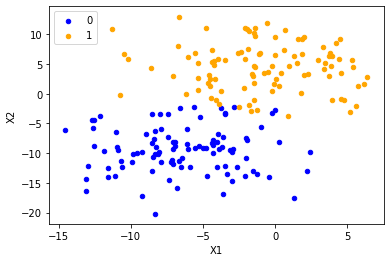

In [214]:
from matplotlib import pyplot as plt
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('Y')
for key, group in grouped:
    group.plot(ax=ax ,kind='scatter', x='X1', y='X2', label=key,color=colors[key])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## Logistic Model

In [215]:
import numpy as np
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [216]:
def hx(w,X):
    z = np.array(w[0] + w[1]*(X[:,0]) + w[2]*(X[:,1]))
    return sigmoid(z)

## log loss function


In [217]:
def cost(w, X, Y):
    y_pred = hx(w,X)
    return -1 * sum(Y*np.log(y_pred) + (1-Y)*np.log(1-y_pred))

## Gradient Descent

In [218]:
def grad(w, X, Y):
    y_pred = hx(w,X)
    g = [0]*3
    g[0] = -1 * sum(Y*(1-y_pred) - (1-Y)*y_pred)
    g[1] = -1 * sum(Y*(1-y_pred)*X[:,0] - (1-Y)*y_pred*X[:,0])
    g[2] = -1 * sum(Y*(1-y_pred)*X[:,1] - (1-Y)*y_pred*X[:,1])
    return g

In [219]:
def descent(w_new, w_prev, lr):
    print(w_prev)
    print(cost(w_prev, X, Y))
    j=0
    while True:
        w_prev = w_new
        w0 = w_prev[0] - lr*grad(w_prev, X, Y)[0]
        w1 = w_prev[1] - lr*grad(w_prev, X, Y)[1]
        w2 = w_prev[2] - lr*grad(w_prev, X, Y)[2]
        w_new = [w0, w1, w2]
        print(w_new)
        print(cost(w_new, X, Y))
        if (w_new[0]-w_prev[0])**2 + (w_new[1]-w_prev[1])**2 + (w_new[2]-w_prev[2])**2 <pow(10,-6):
            return w_new
        
        if j>1000: 
            return w_new
        j+=1

## Initializing Parameters

In [220]:
w=[1,1,1] 

## Training the Model

In [221]:
w = descent(w,w,.0099)
print(w)

[1, 1, 1]
77.32016127503924
[1.2339821302738774, -0.11892583000245827, 1.2678234194963593]
25.26031806829642
[1.32503542382667, 0.04960609319232068, 1.1296883486597504]
21.00507463644719
[1.4192267340474898, 0.04743144871773292, 0.9904642953020242]
18.514471604016528
[1.4976477844644822, 0.08368035133933453, 0.8950512969813933]
17.062453805233535
[1.5674311541172419, 0.09875928687855941, 0.8317871681653576]
16.26538286528446
[1.6284215708330647, 0.11791939985015978, 0.7988788759434141]
15.796994380084847
[1.6847852212108592, 0.12515974595056106, 0.7830486614277106]
15.467346718671457
[1.7365936980978276, 0.13525191570193992, 0.7797413002446794]
15.19498082049333
[1.786142006531449, 0.1385758198685703, 0.7809092296091693]
14.951996454692349
[1.8328898543598564, 0.1450491028704566, 0.7861596490270168]
14.728982337396028
[1.8781465929785885, 0.14748186670720212, 0.7918709694302567]
14.52218471292321
[1.9213529393495283, 0.15234462960493136, 0.7990517182146681]
14.32947870560142
[1.9633154

[4.304394350536993, 0.3252999203889175, 1.4068826400834422]
9.31966040520162
[4.312509928742509, 0.3258773220774728, 1.409302070443373]
9.31239911626583
[4.320588596271967, 0.3264522014398283, 1.4117113915418094]
9.305203190337592
[4.328630727495248, 0.32702458474990065, 1.4141106946239352]
9.298071679634836
[4.336636690740509, 0.3275944978356082, 1.416500069645461]
9.291003655577928
[4.3446068484266265, 0.32816196608915227, 1.4188796052971222]
9.283998208291178
[4.3525415571919925, 0.32872701447700314, 1.4212493890285989]
9.277054446120097
[4.360441168019793, 0.32928966754960204, 1.4236095070718728]
9.270171495163694
[4.368306026359881, 0.32984994945078655, 1.4259600444640357]
9.263348498821482
[4.3761364722473495, 0.33040788392695053, 1.4283010850695665]
9.256584617354395
[4.38393284041792, 0.33096349433594796, 1.4306327116020918]
9.249879027459412
[4.391695460420242, 0.3315168036557459, 1.432955005645641]
9.243230921857055
[4.399424656725208, 0.3320678344928395, 1.4352680476754145]


[5.220688305282392, 0.3913248949963632, 1.6841906245085294]
8.670921213887214
[5.225656609704922, 0.39168807993840304, 1.6857103225170151]
8.668184778076903
[5.230612164782962, 0.3920503919448144, 1.6872262384727739]
8.665462318418662
[5.2355550385435015, 0.392411835546938, 1.68873839163178]
8.662753725190296
[5.240485298431072, 0.3927724152370675, 1.6902468010943326]
8.660058889864965
[5.245403011314616, 0.3931321354689213, 1.6917514858067766]
8.657377705094358
[5.250308243494245, 0.39349100065810566, 1.6932524645631968]
8.654710064692333
[5.255201060707903, 0.3938490151825732, 1.6947497560070903]
8.652055863618658
[5.260081528137931, 0.3942061833830719, 1.6962433786330149]
8.649414997963119
[5.264949710417528, 0.3945625095635887, 1.6977333507882155]
8.646787364929935
[5.269805671637123, 0.39491799799178523, 1.6992196906742267]
8.644172862822336
[5.2746494753506505, 0.39527265289942887, 1.7007024163484554]
8.641571391027476
[5.279481184581735, 0.39562647848281457, 1.7021815457257399]


[5.855744043543083, 0.43822619231978943, 1.8792113946346043]
8.37192321712237
[5.859329231495379, 0.4384936700577474, 1.8803158891003962]
8.370495740497454
[5.862907817513234, 0.438760684737329, 1.8814183806011295]
8.369073505530974
[5.866479825267115, 0.43902723794646903, 1.8825188761446534]
8.36765648389212
[5.870045278291939, 0.43929333126417575, 1.8836173826999203]
8.36624464745962
[5.873604199988145, 0.4395589662606009, 1.884713907197283]
8.364837968319755
[5.877156613622757, 0.43982414449710994, 1.8858084565287874]
8.363436418764387
[5.880702542330431, 0.4400888675263508, 1.8869010375484643]
8.36203997128906
[5.884242009114496, 0.44035313689232286, 1.8879916570726172]
8.360648598590995
[5.887775036847988, 0.44061695413044427, 1.8890803218801078]
8.359262273567287
[5.891301648274664, 0.4408803207676193, 1.8901670387126377]
8.357880969312992
[5.8948218660100125, 0.4411432383223049, 1.8912518142750296]
8.356504659119251
[5.898335712542256, 0.44140570830457615, 1.8923346552355038]
8.

[6.361150151011595, 0.4762165424689747, 2.0351727479022874]
8.194629446670902
[6.3639067382346415, 0.47642526991146683, 2.0360246087342118]
8.193784808470898
[6.366659310416448, 0.4766337092489944, 2.0368752398957835]
8.192942625636409
[6.369407878279355, 0.47684186121489, 2.0377246446235437]
8.19210288806263
[6.372152452500366, 0.47704972653947625, 2.038572826140607]
8.19126558570072
[6.374893043711419, 0.47725730595008375, 2.0394197876567377]
8.190430708557518
[6.377629662499646, 0.47746460017106734, 2.0402655323684273]
8.189598246695066
[6.380362319407634, 0.4776716099238244, 2.041110063458969]
8.188768190230245
[6.3830910249336865, 0.4778783359268109, 2.041953384098533]
8.1879405293344
[6.385815789532077, 0.4780847788955585, 2.0427954974442404]
8.187115254232927
[6.388536623613306, 0.47829093954269164, 2.043636406640239]
8.186292355204952
[6.3912535375443555, 0.47849681857794335, 2.0444761148177752]
8.185471822582892
[6.393966541648939, 0.4787024167081724, 2.0453146250952665]
8.184

[6.705341922694056, 0.5023989485235834, 2.141615056269884]
8.098214445968669
[6.707632439309871, 0.5025739789985864, 2.142323878053803]
8.09763102176574
[6.709920076254106, 0.5027487996105042, 2.1430318143138036]
8.097049062111005
[6.7122048398737455, 0.5029234108006319, 2.1437388669818547]
8.096468561946622
[6.714486736493829, 0.5030978130087885, 2.144445037983334]
8.09588951623798
[6.716765772417552, 0.5032720066733248, 2.145150329237058]
8.09531191997356
[6.719041953926367, 0.5034459922311293, 2.145854742655313]
8.094735768164766
[6.721315287280094, 0.5036197701176353, 2.1465582801438865]
8.094161055845843
[6.723585778717017, 0.503793340766828, 2.147260943602096]
8.0935877780737
[6.725853434453991, 0.503966704611251, 2.1479627349228214]
8.09301592992782
[6.728118260686542, 0.504139862082013, 2.1486636559925323]
8.092445506510103
[6.730380263588967, 0.5043128136087945, 2.149363708691321]
8.091876502944727
[6.732639449314436, 0.5044855596198545, 2.15006289489293]
8.09130891437807
[6.7

[7.044632489507493, 0.5284343310306587, 2.2466676707094217]
8.019424367318669
[7.046524357450475, 0.528580098979147, 2.2472537272518744]
8.019026214503695
[7.048414150158025, 0.5287257134514565, 2.2478391438434104]
8.018628934003246
[7.0503018714360906, 0.5288711747168389, 2.2484239216492576]
8.01823252326527
[7.052187525079797, 0.5290164830438071, 2.2490080618313604]
8.017836979747472
[7.054071114873492, 0.5291616387001377, 2.2495915655483945]
8.0174423009173
[7.055952644590781, 0.5293066419528731, 2.2501744339557783]
8.017048484251875
[7.057832117994579, 0.5294514930683254, 2.2507566682056876]
8.016655527237953
[7.059709538837143, 0.5295961923120783, 2.251338269447065]
8.016263427371863
[7.06158491086012, 0.5297407399489905, 2.2519192388256353]
8.015872182159498
[7.063458237794586, 0.5298851362431983, 2.252499577483916]
8.015481789116235
[7.065329523361087, 0.5300293814581178, 2.253079286561231]
8.015092245766894
[7.067198771269683, 0.5301734758564487, 2.2536583671937214]
8.014703549

## Visualizing the Result

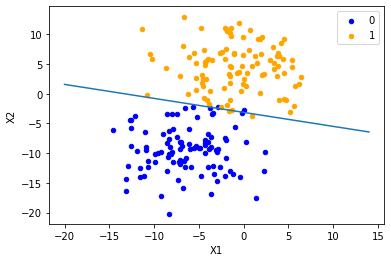

In [222]:
def graph(formula, x_range):  
    x = np.array(x_range)  
    y = formula(x)  
    plt.plot(x, y)  
    
def my_formula(x):
    return (-w[0]-w[1]*x)/w[2]

from matplotlib import pyplot as plt
colors = {0:'blue', 1:'orange'}
fig, ax = plt.subplots()
grouped = df.groupby('Y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='X1', y='X2', label=key, color=colors[key])
graph(my_formula, range(-20,15))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()